In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [2]:
# Importing dataset
dataset = pd.read_csv('car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Understanding the dataset using simple commands
dataset.shape

(301, 9)

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
dataset.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
# Checking different classes of categorical variables
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
# Checking null values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Finalizing the dataset by removing irrelevant features
final = dataset[['Year', 'Selling_Price', 'Present_Price','Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
# Hard coding a feature called 'Current_Year' to calculate the car's age 
final['Current_Year'] = 2020

In [11]:
final['Car_Age'] = final['Current_Year'] - final['Year']

In [12]:
# Dropping 'Year'
final.drop(['Year'], axis = 1, inplace = True)

In [13]:
# Dropping 'Current_Year'
final.drop(['Current_Year'], axis = 1, inplace = True)

In [14]:
# Replacing categorical features by dummy variables and excluding first class of each feature to prevent dummy variable trap
final = pd.get_dummies(final, drop_first = True)

In [15]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
# Checking for correlation of variables
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


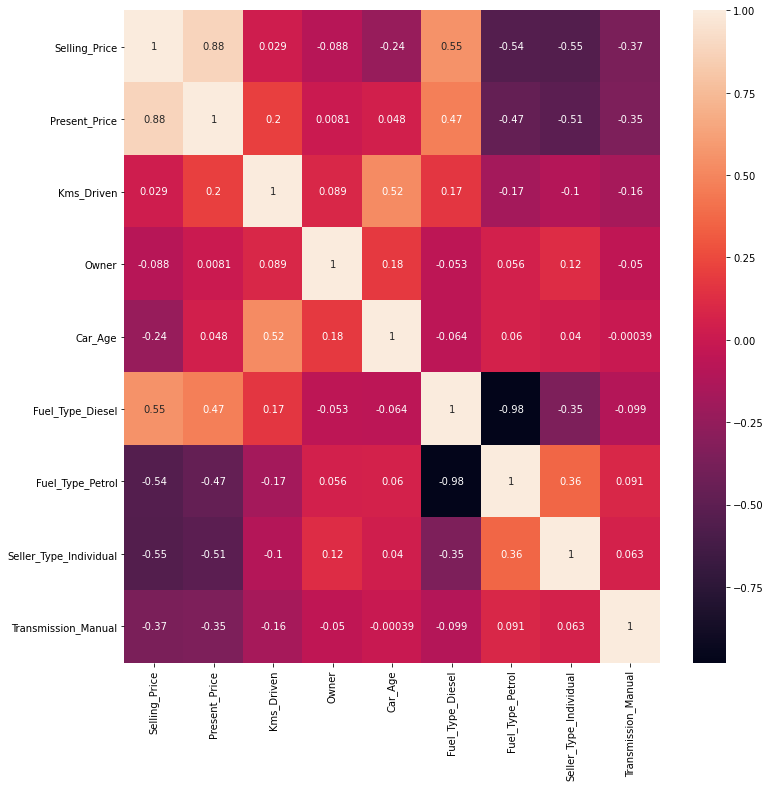

In [17]:
plt.figure(figsize = (12, 12))
sns.heatmap(final.corr(), annot = True);

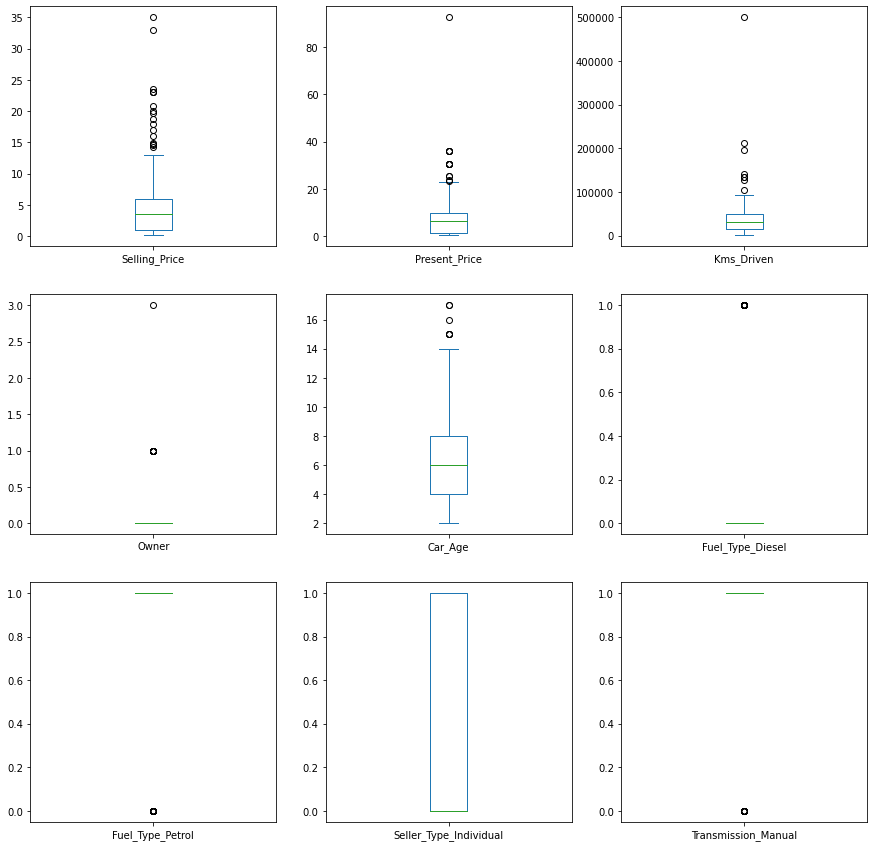

In [18]:
final.plot(kind = 'box', figsize = (15, 15), layout = (3, 3), sharex = True, subplots = True);

In [19]:
# Spliting dataset into X and y
X = final.iloc[:, 1:]
y = final.iloc[:, 0]

In [20]:
# Using extra trees regressor to find the most important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [21]:
# Importance of each feature followed by indexes
print(model.feature_importances_)

[0.41902773 0.0415121  0.00092041 0.07927896 0.20402426 0.01477539
 0.11684633 0.12361482]


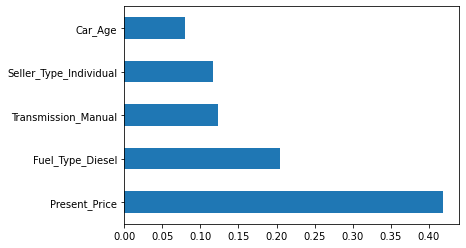

In [22]:
# Visualizing important features
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

In [23]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
# Using Random Forests for model creation(base model)
model_rf = RandomForestRegressor()

In [25]:
# Using Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
# Assigned the parameters in a dict to 'random_grid' variable 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# Using 'random_grid' variable to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state= 42, n_jobs = 1)

In [28]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
# Predicting the model on test set
y_pred = rf_random.predict(X_test)

In [30]:
print(y_pred)

[ 4.69436399  0.3894739   1.35908744  9.95222665  0.39488909  0.37823972
  7.89974181  4.99810148  4.02316031  0.35590677  0.34023267  0.70412183
 14.4177717   0.602517   10.47361368  0.54342375  6.94648241  0.40560989
  5.81837085  7.63904466  2.89906421  0.41368521  3.99042932  4.46104891
  5.87640026  4.72449822  5.33278119  2.71782903  5.11516409  1.23642161
  2.81285576  4.37583815  1.23113579  5.65919378  0.35440141  5.65480023
  5.09690884  0.63368181  5.22212712  5.53932909 10.4615204   5.11481139
  2.74293969  6.86865865 10.75515437  3.7730953   2.85116506  0.86892789
  2.95079344  8.32057338  7.40439934  0.43685895  2.89338171  2.43157588
  0.28995987 17.23779408  0.41972555  1.2067542  10.17855748  1.15372258
 21.57104658]


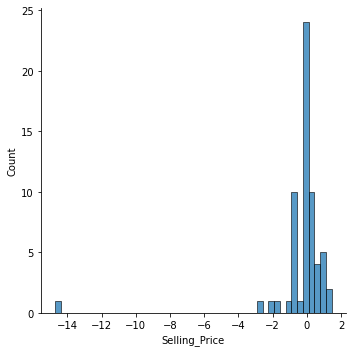

In [31]:
# Visualizing actual data and predicting data to check whether they go along
sns.displot(y_test - y_pred);

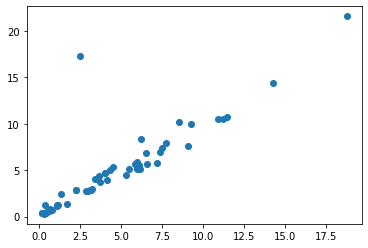

In [32]:
plt.scatter(y_test, y_pred)

In [33]:
# Checking MAE, MSE & RMSE using metrics and converting it in '{:.3}.format' 
print('MAE:', '{:.3f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE:', '{:.3f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE:', '{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 0.729
MSE: 4.086
RMSE: 2.021


In [34]:
# Creating a pickle file
file = open('random_forest_regression_model.pkl', 'wb')
# Dumping information to that file
pickle.dump(rf_random, file)